# Business Report Project – SMDM (17th March-2022) 
   ## Submitted by: ARUNKUMAR S


__1 – Wholesale Customer Data Analysis__

1.1Problem 1.12

1.2Problem 1.2

1.3Problem 1.3

1.4Problem 1.4

1.5Problem 1.5

__2 - Clear Mountain State University (CMSU) Survey__

2.1Problem 2.1

2.2Problem 2.2

2.3.Problem 2.3

2.4.Problem 2.4

2.5.Problem 2.5

2.7.Problem 

2.8.Problem 

__3 – Hypothesis Testing for Quality of Shingles__

3.1.Problem 

3.2.Problem 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import variation
from scipy.stats import shapiro

# Problem 1
Wholesale Customers Analysis

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

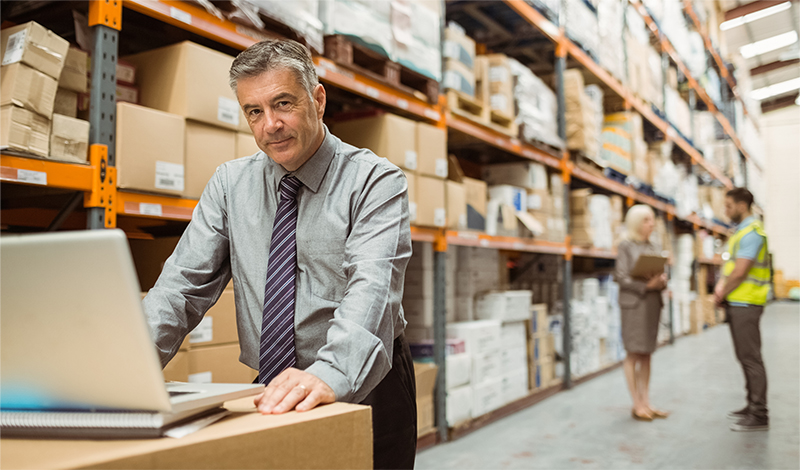

In [2]:
%cd

/Users/balask


In [3]:
os.chdir('/Users/balask/Downloads/')

In [4]:
problem1_data=pd.read_csv("Wholesale+Customers+Data.csv")
problem1_data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [5]:
problem1_data.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [6]:
problem1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
problem1_data['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [8]:
problem1_data['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [9]:
problem1_data.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
Channel=problem1_data['Channel'].unique()
Channel

array(['Retail', 'Hotel'], dtype=object)

In [10]:
Region=problem1_data['Region'].unique()
Region

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [11]:
problem1_data.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


__Infer about Channel and Region:__

- From the above data there are 2 unique values, the channel 'Hotel' has most frequent with 298 out of 440 transactions. The channel spending comes from the 'hotel' is 67.73%

- The region has top frequent in 'Other' among the 3 unique values as this having 316 out of 440 transactions.

__Item type: Fresh__
- The item has 440 records and it's mean of 12000.30, standard deviation of 12647.33, minimum value is 3 and the maximum value is 112151

- The item has Q1(25%)=3127.75 ,Q2(50%)=8504 Q3(75%)=16933.75 and the inter quartile range (IQR)= 138806(Q3-Q1).

- Range(Max-min)= 112148(112151-3) and it helps to calculate the outliers.


The boxplot of Fresh:


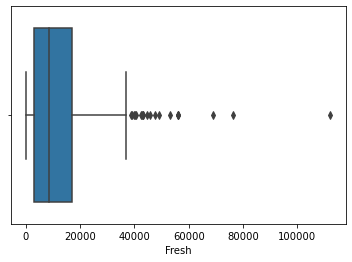

In [12]:
sns.boxplot(problem1_data['Fresh'])
print('The boxplot of Fresh:')

__Item type: Milk__
- The item has 440 records and it's mean of 5796.27, standard deviation of 7380.38, minimum value is 55 and the maximum value is 73498

- The item has Q1(25%)=1533 ,Q2(50%)=3627 Q3(75%)=7190.25 and the inter quartile range (IQR)= 5657.25(Q3-Q1).

- Range(Max-min)= 73443(73498-55) and it helps to calculate the outliers.


The boxplot of Milk:


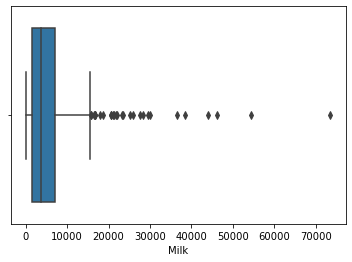

In [13]:
sns.boxplot(problem1_data['Milk'])
print('The boxplot of Milk:')

__Item type: Grocery__
- The item has 440 records and it's mean of 7951.28, standard deviation of 9503.16, minimum value is 3 and the maximum value is 92780.

- The item has Q1(25%)=2153 ,Q2(50%)=4755.5 Q3(75%)=10655.8 and the inter quartile range (IQR)= 8502.8(Q3-Q1).

- Range(Max-min)= 92777(92780-3) and it helps to calculate the outliers.

The boxplot of Grocery:


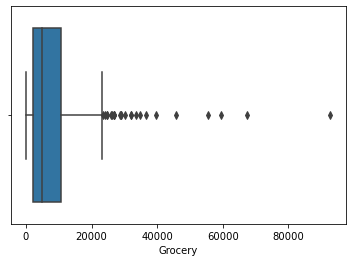

In [14]:
sns.boxplot(problem1_data['Grocery'])
print('The boxplot of Grocery:')

__Item type: Frozen__
- The item has 440 records and it's mean of 3071.93, standard deviation of 4854.67, minimum value is 25 and the maximum value is 60869.

- The item has Q1(25%)=742.25 ,Q2(50%)=1526 Q3(75%)=3554.25 and the inter quartile range (IQR)= 2812(Q3-Q1).

- Range(Max-min)= 60844(60869-25) and it helps to calculate the outliers.

The boxplot of Frozen:


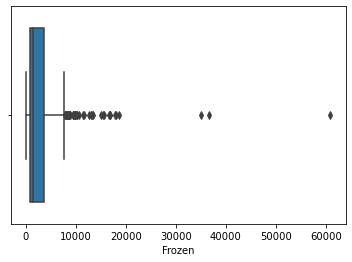

In [15]:
sns.boxplot(problem1_data['Frozen'])
print('The boxplot of Frozen:')

__Item type: Detergents_Paper__	

- The item has 440 records and it's mean of 2881.49, standard deviation of 4767.85, minimum value is 3 and the maximum value is 40827.

- The item has Q1(25%)=256.75 ,Q2(50%)=816.5 Q3(75%)=3922 and the inter quartile range (IQR)= 3665.25(Q3-Q1).

- Range(Max-min)= 40824(40827-3) and it helps to calculate the outliers.

The boxplot of Detergents_Paper:


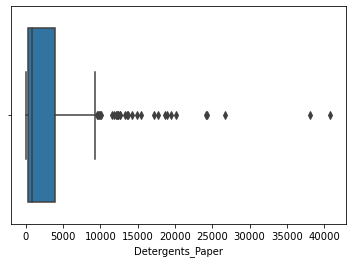

In [11]:
sns.boxplot(problem1_data['Detergents_Paper'])
print('The boxplot of Detergents_Paper:')

__Item type: Delicatessen__	

- The item has 440 records and it's mean of 1524.87, standard deviation of 2820.11, minimum value is 3 and the maximum value is 47943.

- The item has Q1(25%)=408.25 ,Q2(50%)=965.5 Q3(75%)=1820.25 and the inter quartile range (IQR)= 1412(Q3-Q1).

- Range(Max-min)= 47940(47943-3) and it helps to calculate the outliers.

The boxplot of Delicatessen:


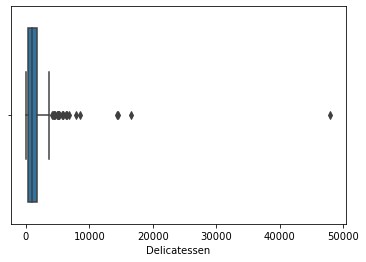

In [12]:
sns.boxplot(problem1_data['Delicatessen'])
print('The boxplot of Delicatessen:')

In [18]:
problem1_data['Spending'] =problem1_data['Fresh']+problem1_data['Milk']+problem1_data['Grocery']+problem1_data['Frozen']+problem1_data['Detergents_Paper']+problem1_data['Delicatessen']
problem1_data
region_spent = problem1_data.groupby('Region')['Spending'].sum()
print(region_spent)
Channel_spent=problem1_data.groupby('Channel')['Spending'].sum()
print(Channel_spent)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64
Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


## From the above details we conclude:
- The highest spend in the Region is from Others and lowest spend in the region is from Oporto
- The highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [21]:
problem1_data.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

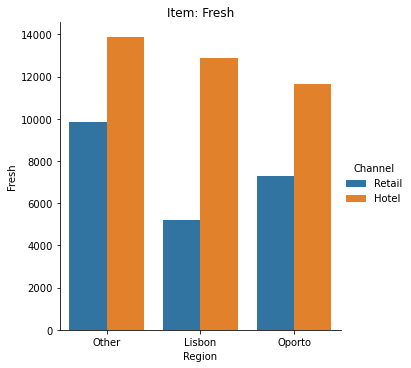

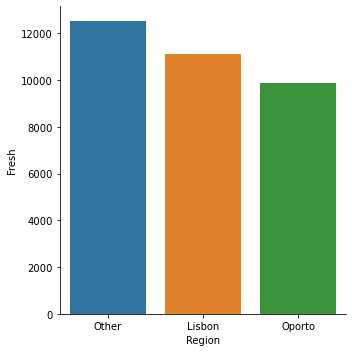

In [13]:
sns.catplot(x="Region", y="Fresh", kind="bar", hue='Channel',ci=None, data=problem1_data)
plt.title('Item: Fresh')

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Fresh item sold more in Hotel channel

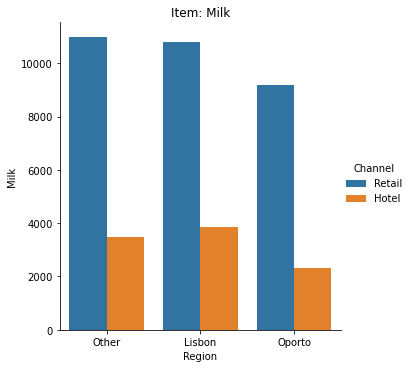

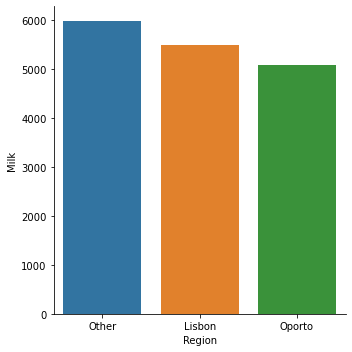

In [15]:
sns.catplot(x="Region", y="Milk", kind="bar", hue ="Channel",ci=None, data=problem1_data)
plt.title('Item: Milk')

sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Milk item sold more in Retail channel

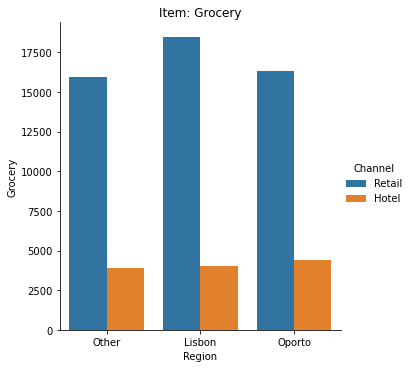

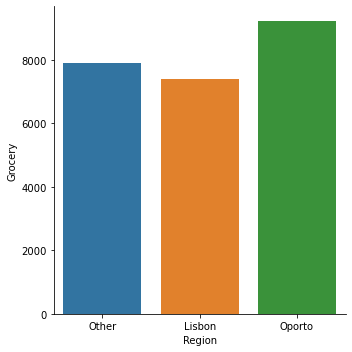

In [16]:
sns.catplot(x="Region", y="Grocery", kind="bar", hue ="Channel",ci=None, data=problem1_data)
plt.title('Item: Grocery')

sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Grocery item sold more in Retail channel

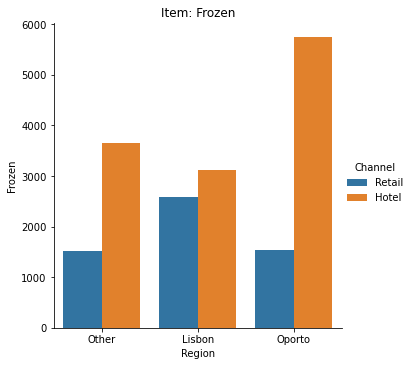

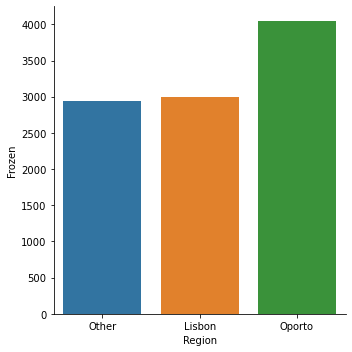

In [17]:
sns.catplot(x="Region", y="Frozen", kind="bar", hue ="Channel",ci=None, data=problem1_data)
plt.title('Item: Frozen')

sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Frozen item sold more in Hotel channel

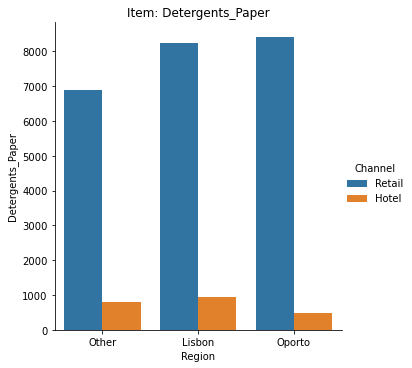

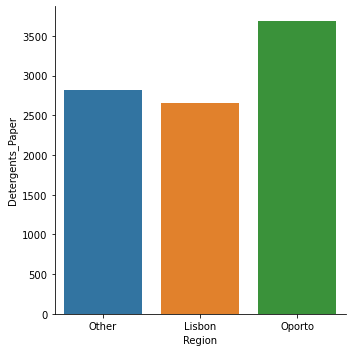

In [18]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar",hue ="Channel",ci=None, data=problem1_data)
plt.title('Item: Detergents_Paper')

sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Detergents_Paper item sold more in Retail channel

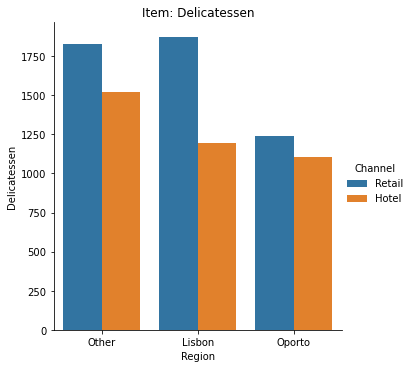

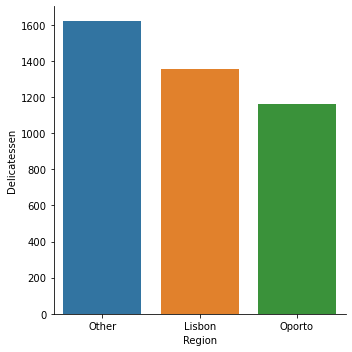

In [20]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", hue ="Channel",ci=None, data=problem1_data)
plt.title('Item: Delicatessen')

sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=problem1_data)

- From the above plot, the Delicatessen item sold more in Retail channel

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [22]:
#Consistency behaviour using Coefficient of Variation
CV_Fresh=(np.std(problem1_data['Fresh']) / np.mean(problem1_data['Fresh']))
CV_Milk=(np.std(problem1_data['Milk']) / np.mean(problem1_data['Milk']))
CV_Grocery=(np.std(problem1_data['Grocery']) / np.mean(problem1_data['Grocery']))
CV_Frozen=(np.std(problem1_data['Frozen']) / np.mean(problem1_data['Frozen']))
CV_Detergents_Paper=(np.std(problem1_data['Detergents_Paper']) / np.mean(problem1_data['Detergents_Paper']))
CV_Delicatessen=(np.std(problem1_data['Delicatessen']) / np.mean(problem1_data['Delicatessen']))
print(' CV of Fresh=',CV_Fresh,'\n' ,'CV of Milk=',CV_Milk,'\n','CV of Grocery=',CV_Grocery,'\n',
       'CV of Frozen=',CV_Frozen,'\n', 'CV of Detergents_Paper=',CV_Detergents_Paper,'\n', 'CV of Delicatessen=',CV_Delicatessen)

 CV of Fresh= 1.0527196084948245 
 CV of Milk= 1.2718508307424503 
 CV of Grocery= 1.193815447749267 
 CV of Frozen= 1.5785355298607762 
 CV of Detergents_Paper= 1.6527657881041729 
 CV of Delicatessen= 1.8473041039189306


__From the above coefficient of variation of all 6 products__
- Item “Fresh” have lowest coefficient of Variation So that is least Inconsistent.

- Item “Delicatessen” have highest coefficient of Variation, So that is most Inconsistent.


# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

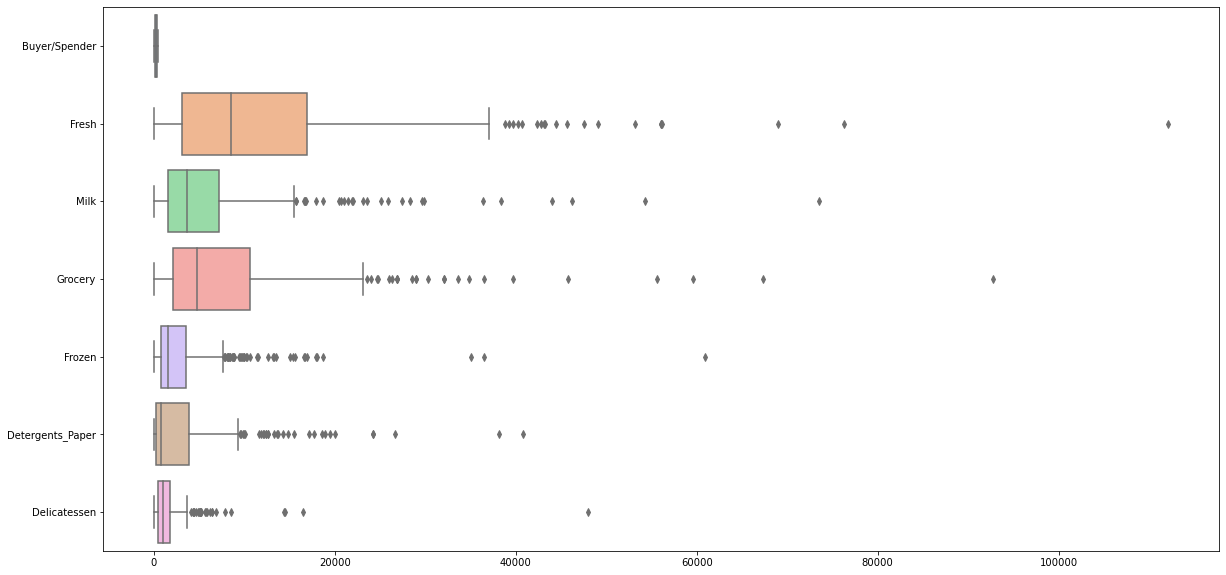

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=problem1_data, orient="h", palette="pastel")

### From the above boxplot, 

- Yes,there are outliers in all items given in the data.

- Item list in the data: Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective



- Further to the above analysis, the dataset have data about sales of 6 category of products across 3 regions via 2 channel.

__The Frequency Region (Total 3 Region have 440 rows)__
- Lisbon 77 rows
- Oporto 47 rows
- Other 316 row

__The Frequency Channel (Total 2 Channel have 440 rows)__ 
- Hotel 298 rows 
- Retail 142 rows

As per my recommendation, The Region 'others' should focuse more because of the spending is higher. Currently the Channel ' Hotel' having the most of the spendings.

Also we can see the Item wise spending level and based that we will keep the items productivity as per the Channel requirement

- Fresh Item: Hotel has the higher demand
- Milk Item: Retail has the higher demand
- Grocery Item: Retail has the higher demand
- Frozen Item: Hotel has the higher demand
- Detergents_Paper Item: Retail has the higher demand
- Delicaterssen Item: Retail has the higher demand

The out of 6 items the most demand is having Retail channel as the supply of the items to the Channel is very important, whereas accordingly we should forecast the requirement in order to improve the prodcutivity and income.

The Fresh Item has higher demand material among the other 5 category of products, And the rest of products also need to achive their spending more in the region and we will make them as higher spending products as like Fresh item.

# Problem 2 

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

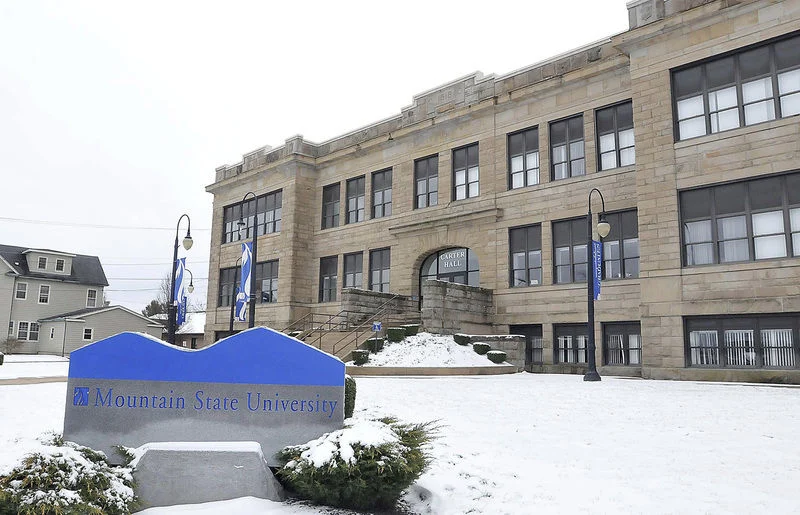

In [25]:
problem2_data=pd.read_csv('Survey-1.csv')
problem2_data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [26]:
problem2_data.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [27]:
problem2_data.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [28]:
problem2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)



## 2.1.1. Gender and Major



In [29]:
Gender_Major = pd.crosstab(problem2_data['Gender'],problem2_data['Major'], margins = False)
                               
print(Gender_Major)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


## 2.1.2. Gender and Grad Intention



In [30]:
Gender_Grad_Intention= pd.crosstab(problem2_data['Gender'],problem2_data['Grad Intention'], margins = False)
print(Gender_Grad_Intention)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


## 2.1.3. Gender and Employment



In [31]:
Gender_Employment= pd.crosstab(problem2_data['Gender'],problem2_data['Employment'], margins = False)
print(Gender_Employment)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


## 2.1.4. Gender and Computer



In [32]:
Gender_Computer= pd.crosstab(problem2_data['Gender'],problem2_data['Computer'], margins = False)
print(Gender_Computer)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



In [33]:
problem2_data['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

2.2.1. What is the probability that a randomly selected CMSU student will be male?



In [34]:
prob_random_male=(29/62)*100
print('The probability that a randomly selected CMSUstudent will be male is',prob_random_male,"Percentage")

The probability that a randomly selected CMSUstudent will be male is 46.774193548387096 Percentage


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?



In [35]:
prob_random_female=(33/62)*100
print('The probability that a randomly selected CMSUstudent will be female is',prob_random_female,"Percentage")

The probability that a randomly selected CMSUstudent will be female is 53.2258064516129 Percentage


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.



In [36]:
Gender_Major = pd.crosstab(problem2_data['Gender'],problem2_data['Major'], margins = False)
                               
print(Gender_Major)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [37]:
Male_Accounting=4/29*100
print('Probability of Males opting for Accounting is',Male_Accounting,'%')

Male_CIS=1/29*100
print('Probability of Males opting for CIS is',Male_CIS,'%')

Male_Economics_Finance=4/29*100
print('Probability of Males opting for Economics/Finance is',Male_Economics_Finance,'%')

Male_International_Business=2/29*100
print('Probability of Males opting for International Business is',Male_International_Business,'%')

Male_Management=6/29*100
print('Probability of Males opting for Management is',Male_Management,'%')

Male_Other=4/29*100
print('Probability of Males opting for Other is',Male_Other,'%')

Male_Retailing_Marketing=5/29*100
print('Probability of Males opting for Retailing/Marketing is',Male_Retailing_Marketing,'%')

Male_Undecided=3/29*100
print('Probability of Males opting for Undecided is',Male_Undecided,'%')

print('\n We can say that most of the males students prefer Management as Majors and CIS is the least preferred one')

Probability of Males opting for Accounting is 13.793103448275861 %
Probability of Males opting for CIS is 3.4482758620689653 %
Probability of Males opting for Economics/Finance is 13.793103448275861 %
Probability of Males opting for International Business is 6.896551724137931 %
Probability of Males opting for Management is 20.689655172413794 %
Probability of Males opting for Other is 13.793103448275861 %
Probability of Males opting for Retailing/Marketing is 17.24137931034483 %
Probability of Males opting for Undecided is 10.344827586206897 %

 We can say that most of the males students prefer Management as Majors and CIS is the least preferred one


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.



In [38]:
Female_Accounting=3/33*100
print('Probability of females opting for Accounting is',Female_Accounting,'%')

Female_CIS=3/33*100
print('Probability of females opting for CIS is',Female_CIS,'%')

Female_Economics_Finance=7/33*100
print('Probability of females opting for Economics/Finance is',Female_Economics_Finance,'%')

Female_International_Business=4/33*100
print('Probability of females opting for International Business is',Female_International_Business,'%')

Female_Management=4/33*100
print('Probability of females opting for Management is',Female_Management,'%')

Female_Other=3/33*100
print('Probability of females opting for Other is',Female_Other,'%')

Female_Retailing_Marketing=9/33*100
print('Probability of females opting for Retailing/Marketing is',Female_Retailing_Marketing,'%')

Female_Undecided=0/33*100
print('Probability of females opting for Undecided is',Female_Undecided,'%')

print('\nwe can say that most of the females students prefer Retailing/Marketing as Majors')

Probability of females opting for Accounting is 9.090909090909092 %
Probability of females opting for CIS is 9.090909090909092 %
Probability of females opting for Economics/Finance is 21.21212121212121 %
Probability of females opting for International Business is 12.121212121212121 %
Probability of females opting for Management is 12.121212121212121 %
Probability of females opting for Other is 9.090909090909092 %
Probability of females opting for Retailing/Marketing is 27.27272727272727 %
Probability of females opting for Undecided is 0.0 %

we can say that most of the females students prefer Retailing/Marketing as Majors


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:



## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.



In [39]:
Gender_Grad_Intention= pd.crosstab(problem2_data['Gender'],problem2_data['Grad Intention'], margins = False)
print(Gender_Grad_Intention)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [40]:
Male_intend_grad=17/29*100
print('probability That a randomly chosen student is a male and intends to graduate is',Male_intend_grad,'%')

probability That a randomly chosen student is a male and intends to graduate is 58.620689655172406 %


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 



In [41]:
Gender_Computer= pd.crosstab(problem2_data['Gender'],problem2_data['Computer'], margins = False)
print(Gender_Computer)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [60]:
Female_no_laptop=4/33*100
print('probability that a randomly selected student is a female and does NOT have a laptop is',Female_no_laptop,'%')

probability that a randomly selected student is a female and does NOT have a laptop is 12.121212121212121 %


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



## 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?



In [42]:
Gender_Employment= pd.crosstab(problem2_data['Gender'],problem2_data['Employment'], margins = False)
print(Gender_Employment)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [47]:
Fulltime_employment=7/29*100
print('probability that a randomly chosen student is a male or has full-time employment is',Fulltime_employment,'%')

probability that a randomly chosen student is a male or has full-time employment is 24.137931034482758 %


## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.



In [43]:
Gender_Major = pd.crosstab(problem2_data['Gender'],problem2_data['Major'], margins = False)
                               
print(Gender_Major)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [44]:
Female_major=(4+4)/33*100
print('probability that given a female student is randomly chosen, she is majoring in international business or management is',Female_major,'%')

probability that given a female student is randomly chosen, she is majoring in international business or management is 24.242424242424242 %


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


In [45]:
Gender_Grad_Intention= pd.crosstab(problem2_data['Gender'],problem2_data['Grad Intention'], margins = False)
print(Gender_Grad_Intention)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [46]:
#P(A n B) =P(A) x P(B)
#P(A)=Graduate_intention
#P(B)=Female

a=28/40 #Greadute intention having students
print('P(A)',a)

b=11/20 #Female students
print('P(B)',b)

print('These probabilities are not equal Hence we can conclude the gradute intention and being famale are independent for the data provided')

P(A) 0.7
P(B) 0.55
These probabilities are not equal Hence we can conclude the gradute intention and being famale are independent for the data provided


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.



# Answer the following questions based on the data




In [47]:
problem2_data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [48]:
problem2_data.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [49]:
problem2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [50]:
Gender_GPA = pd.crosstab(problem2_data['GPA'],problem2_data['Gender'], margins = False)
                               
print(Gender_GPA)

Gender_GPA.sum()

Gender  Female  Male
GPA                 
2.3          1     0
2.4          1     0
2.5          2     4
2.6          0     2
2.8          1     2
2.9          3     1
3.0          5     2
3.1          2     5
3.2          4     2
3.3          3     2
3.4          2     5
3.5          4     2
3.6          1     2
3.7          2     0
3.8          1     0
3.9          1     0


Gender
Female    33
Male      29
dtype: int64

In [51]:
Less_than_3_GPA_Gender=(17) #2.3, 2.4, 2.5, 2.6, 2.8, 2.9
Total_Gender=(33+29)
Prob_His_Her_GPA_Less_Than_3=(Less_than_3_GPA_Gender/Total_Gender)*100
print('the probability that his/her GPA is less than 3 is',Prob_His_Her_GPA_Less_Than_3,'%')

the probability that his/her GPA is less than 3 is 27.419354838709676 %


## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.



In [52]:
Gender_Earns = pd.crosstab(problem2_data['Salary'],problem2_data['Gender'], margins = False)

               
print(Gender_Earns)

Gender_Earns.sum()

Gender  Female  Male
Salary              
25.0         0     1
30.0         5     0
35.0         1     1
37.0         0     1
37.5         1     0
40.0         5     7
42.0         1     0
45.0         1     4
47.0         0     1
47.5         1     0
50.0         5     4
52.0         0     1
54.0         0     1
55.0         5     3
60.0         5     3
65.0         0     1
70.0         1     0
78.0         1     0
80.0         1     1


Gender
Female    33
Male      29
dtype: int64

In [61]:
#the conditional probability that a randomly selected male earns 50 or more
possible_male=14
Total_male=29
P_male=possible_male/Total_male*100
print('the conditional probability that a randomly selected male earns 50 or more is',P_male,'%')

#the conditional probability that a randomly selected female earns 50 or more
possible_female=18
Total_female=33
P_female=possible_female/Total_female*100
print('the conditional probability that a randomly selected female earns 50 or more is',P_female,'%')

the conditional probability that a randomly selected male earns 50 or more is 48.275862068965516 %
the conditional probability that a randomly selected female earns 50 or more is 54.54545454545454 %


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [58]:
problem2_data[['GPA','Salary','Spending','Text Messages']]

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [60]:
problem2_data[['GPA','Salary','Spending','Text Messages']].describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([2.3, 2.4, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.8, 2.8, 2.8,
 

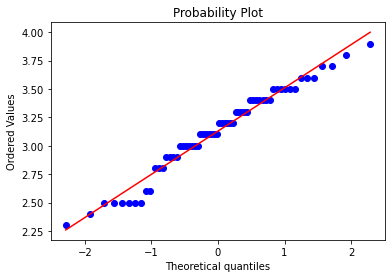

In [91]:
stats.probplot(problem2_data['GPA'],plot=plt)

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

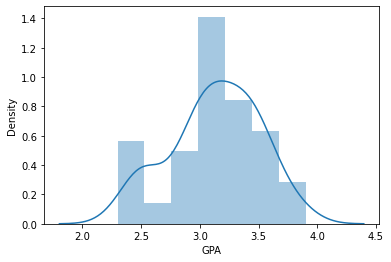

In [112]:
sns.distplot(problem2_data['GPA'])
GPA=stats.shapiro(problem2_data['GPA'])
GPA

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([25. , 30. , 30. , 30. , 30. , 30. , 35. , 35. , 37. , 37.5, 40. ,


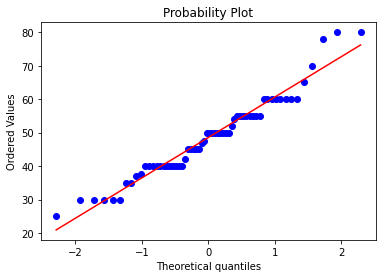

In [94]:
stats.probplot(problem2_data['Salary'],plot=plt)

ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)

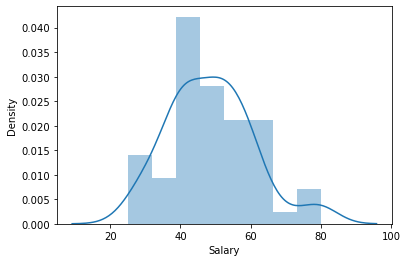

In [114]:
sns.distplot(problem2_data['Salary'])
Salary=stats.shapiro(problem2_data['Salary'])
Salary

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([ 100,  200,  200,  200,  200,  220,  250,  250,  300,  300,  300,


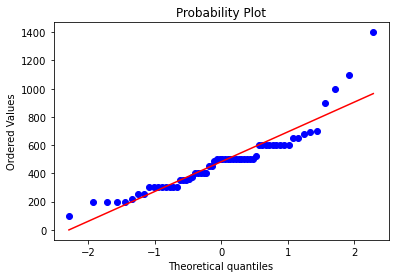

In [107]:
stats.probplot(problem2_data['Spending'],plot=plt)

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

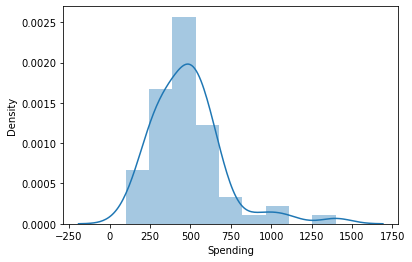

In [115]:
sns.distplot(problem2_data['Spending'])
Spending=stats.shapiro(problem2_data['Spending'])
Spending

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([  0,  10,  30,  35,  40,  45,  50,  50,  50,  50,  50,  50,  60,
 

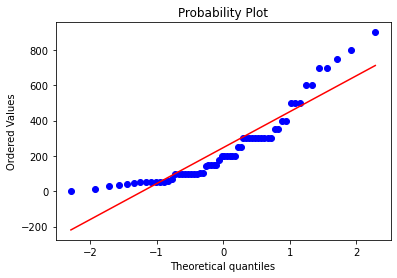

In [102]:
stats.probplot(problem2_data['Text Messages'],plot=plt)

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

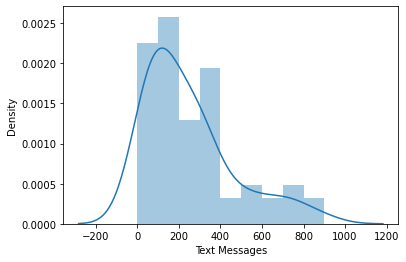

In [118]:
sns.distplot(problem2_data['Text Messages'])
Text_Messages=stats.shapiro(problem2_data['Text Messages'])
Text_Messages

In [84]:
stats.shapiro(problem2_data['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [145]:
print('GPA:',GPA)
print('Salary:',Salary)
print('Spending:',Spending)
print('Text Messages:',Text_Messages)

GPA: ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
Salary: ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)
Spending: ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
Text Messages: ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


In [146]:
shapiro(problem2_data['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

__Summarization of conclusion__
- From the above four data sets the 'Salary' is not following the normal distribution (pvalue < 0.05)
- From the above four data sets 'GPA','Spending', 'Text Messages' are following the normal distribution (pvalue > 0.05)

# Problem 3
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

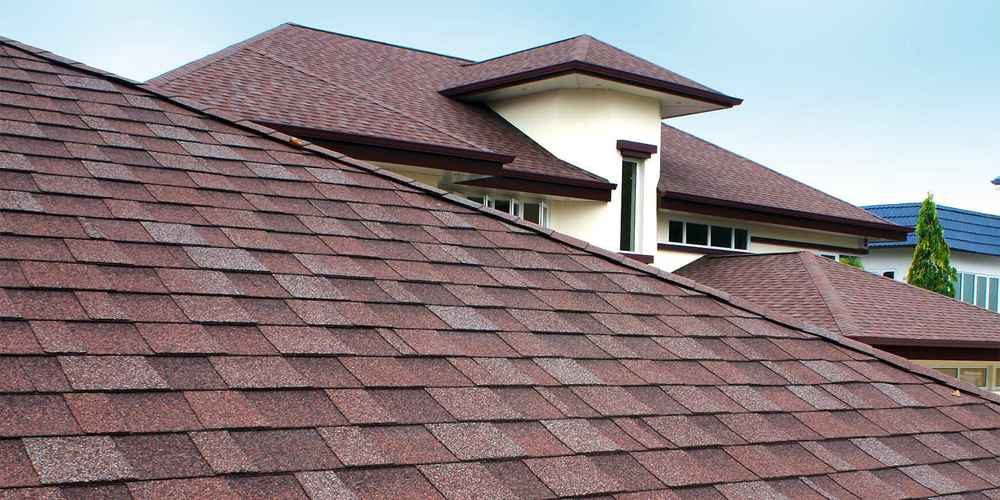

In [126]:
problem3_data=pd.read_csv('A+&+B+shingles.csv')
problem3_data

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

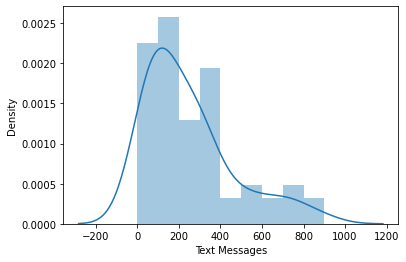

In [16]:
sns.distplot(problem2_data['Text Messages'])

In [63]:
problem3_data.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [68]:
problem3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.



__H0 = the mean moisture content is not less than 0.35 pounds per 100 square feet.__

__H1 = the mean moisture content is less than 0.35 pounds per 100 square feet.__

In [132]:
t_statistic, p_value = stats.ttest_1samp(problem3_data.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


__Sample A conclusion:__
- Since the pvalue > 0.05, do aceept the H0 (Null hypothesis). 
- The evidence is not enough to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. 
- p-value = 0.0748. 
- If the population mean moisture content is in fact no less than 0.35 pounds per 100 square feet, the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is .0748.

In [136]:
t_statistic, p_value = stats.ttest_1samp(problem3_data.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


__Sample B conclusion:__
- Since pvalue < 0.05, do accept the H1 (Alternate hypothesis). 
- The evidence is enough to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet.
- p-value = 0.0021. 
- If the population mean moisture content is in fact no less than 0.35pounds per 100 square feet, the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is .0021.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

μ(A) = Population mean of shingles A

μ(B) = Population mean of shingles B

H0 (Null hypothesis) : μ(A)= μ(B)

H1 (Alternate hypothesis) : μ(A)!= μ(B)

α (Level of significance) = 0.05 

In [141]:
t_statistic,p_value=stats.ttest_ind(problem3_data['A'],problem3_data['B'],equal_var=True ,nan_policy='omit')
print("Two sample t test \n t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3))) 

Two sample t test 
 t_statistic=1.29 and pvalue=0.202


- The pvalue > α , do accept the H0 (Null hypothesis).
- we can say that population mean for shingles A and B test are equal 
- While running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. 